<a href="https://colab.research.google.com/github/bomishot/section1_project/blob/main/Section1_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**김보미님은 게임 회사의 데이터 팀에 합류했습니다.**
## **'다음 분기에 어떤 게임을 설계해야 할까'**
**라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고,  의사결정을 하고자 하는 것이 여러분의 목표**

* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 배급한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.


# EDA

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import random
from scipy import stats
from datetime import datetime
from scipy.stats import ttest_1samp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [2]:
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
print(df.isnull().sum())
print(df.isnull().sum().sum())

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
379


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(16241, 9)

16598개의 열 중 379개의 데이터는 큰 의미를 가지지 않을 것으로 보고, 결측치 값을 가진 열들을 다 삭제하였다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


* Sales 열(출고량)의 단위 구해줘야함
  * Millons(백만) 단위로 보겠다.
  * M이라 쓰여진 것은 M만 없애주기
  * K가 들어간 것 : K의 단위는 1000이니, M단위에서는 무의미한 것이므로 0으로 대체
  * 0M, 0K -> 0으로 바꿔주기기

In [9]:
new_df = df.copy()

In [10]:
new_df.iloc[10,5:]

NA_Sales        480K
EU_Sales       0.33M
JP_Sales          0K
Other_Sales     0.06
Name: 10, dtype: object

In [11]:
new_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].apply(lambda x : x.str.replace('K', '').replace(r'\d*\.\d*M|0M', '0', regex=True))

In [12]:
new_df.iloc[10,5:]

NA_Sales        480
EU_Sales          0
JP_Sales          0
Other_Sales    0.06
Name: 10, dtype: object

In [13]:
new_df['Year'] = new_df['Year'].astype(int)
new_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']] = new_df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].astype(float)

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [16]:
new_df.duplicated().sum()

0

In [17]:
new_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [18]:
new_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,2.187208,1.077473,0.546237,0.279905
std,155.484265,56.716110,32.092892,24.195140,7.321134
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,4100.000000,2560.000000,2780.000000,560.000000


In [19]:
new_df['Sales'] = new_df.iloc[:, 5:10].sum(axis=1)

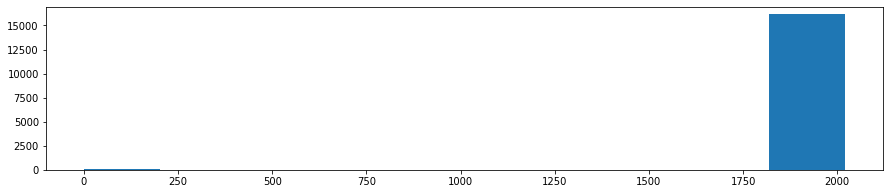

In [20]:
# Year열 시각화 - min값 이상
plt.figure(figsize=(15,3))
plt.hist(new_df.Year);

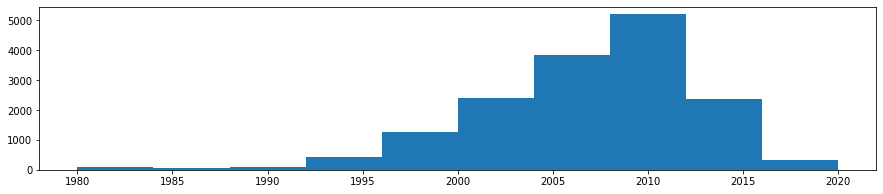

In [21]:
plt.figure(figsize=(15,3))
plt.hist(new_df.Year[new_df.Year>1000]);

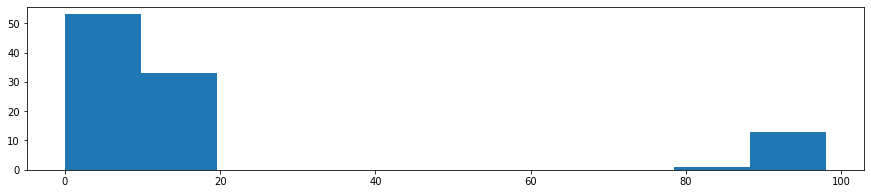

In [22]:
plt.figure(figsize=(15,3))
plt.hist(new_df.Year[new_df.Year<1000]);

In [23]:
year0 = new_df[new_df['Year']<100].index
new_df.drop(year0, inplace=True)

In [24]:
new_df.describe()
# Year의 min값 조정된 것 확인.

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,2006.406356,2.198538,1.083176,0.548804,0.281331,4.111849
std,5.830780,56.891272,32.192054,24.269912,7.343749,70.270360
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000
max,2020.000000,4100.000000,2560.000000,2780.000000,560.000000,4103.500000


* NA_Sales : 북미 지역에서의 출고량 
이상치를 제거하려고 보았으나, 폭넓은 다양한 분야 가지는 column들인 걸로 추정됨.   
1000넘는 것 9개  
100넘는 것 41개  
10 넘는것 80개


In [25]:
new_df.NA_Sales.describe()

count    16141.000000
mean         2.198538
std         56.891272
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max       4100.000000
Name: NA_Sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f833ed406a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f833ed40c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f833ed403d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f833ecce220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f833ecce4f0>],
 'means': []}

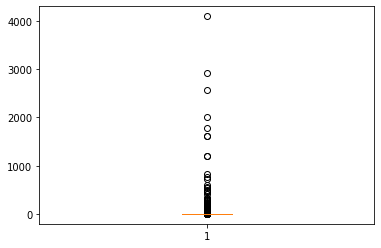

In [26]:
plt.boxplot(new_df.NA_Sales)

In [30]:
new_df[new_df.NA_Sales>1000].shape

(9, 10)

In [31]:
new_df[new_df.NA_Sales>100].shape

(41, 10)

In [32]:
new_df[new_df.NA_Sales>10].shape

(80, 10)

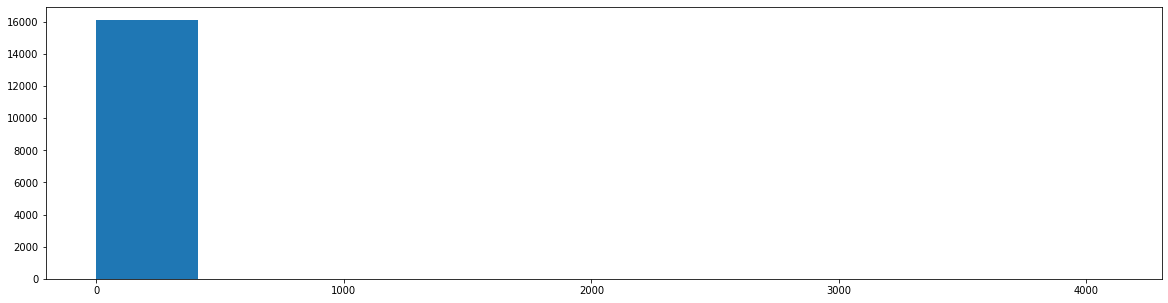

In [34]:
plt.figure(figsize=(20,5))
plt.hist(new_df.NA_Sales);

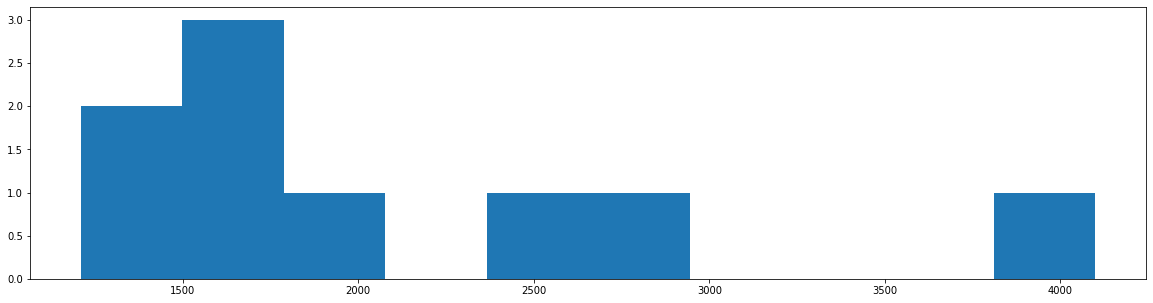

In [35]:
plt.figure(figsize=(20,5))
plt.hist(new_df.NA_Sales[new_df.NA_Sales>1000]);

* EU_Sales
1000개 넘는 것 3개  
100개 넘는 것 23개  
10개 넘는 것 64개

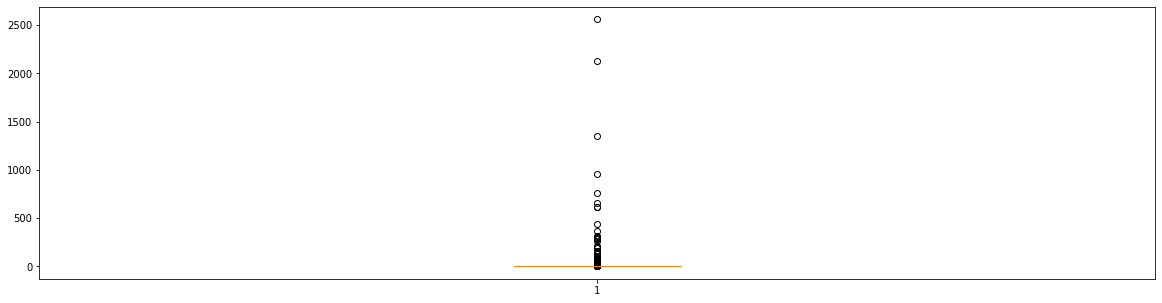

In [36]:
plt.figure(figsize=(20,5))
plt.boxplot(new_df.EU_Sales);

In [37]:
new_df.EU_Sales[new_df.EU_Sales>1000].count()

3

In [38]:
new_df.EU_Sales[new_df.EU_Sales>100].count()

23

In [39]:
new_df.EU_Sales[new_df.EU_Sales>10].count()

64

* JP_Sales
1000 넘는 것 2개  
100 넘는 것 16개  
10 넘는 것 37개

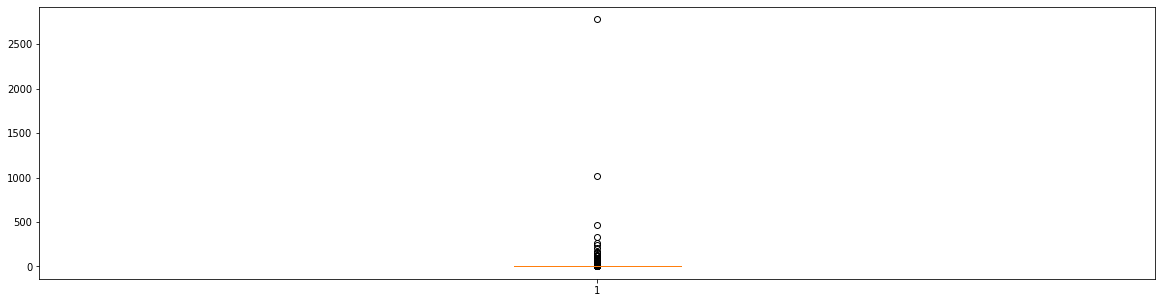

In [40]:
plt.figure(figsize=(20,5))
plt.boxplot(new_df.JP_Sales);

In [41]:
new_df.JP_Sales[new_df.JP_Sales>1000].count()

2

In [42]:
new_df.JP_Sales[new_df.JP_Sales>100].count()

16

In [43]:
new_df.JP_Sales[new_df.JP_Sales>10].count()

37

* Other_Sales
100 넘는것 9개  
10 넘는것 37개

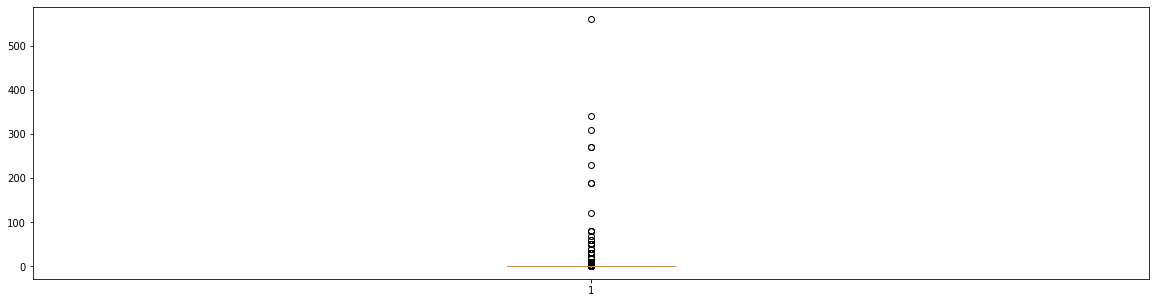

In [44]:
plt.figure(figsize=(20,5))
plt.boxplot(new_df.Other_Sales);

In [45]:
new_df.Other_Sales[new_df.Other_Sales>100].count()

9

In [46]:
new_df.Other_Sales[new_df.Other_Sales>10].count()

39

## PCA

PCA 차원 축소 기법 적용
PCA(Principal Component Analysis)는 주어진 데이터셋에서 가장 많은 분산을 설명하는 특성을 추출하여 데이터를 차원 축소하는 기법입니다. 이를 사용하여 주어진 데이터프레임을 차원 축소할 수 있습니다.

먼저, PCA를 적용하기 전에 데이터셋에서 범주형 변수와 중복된 변수를 제거해야합니다. 범주형 변수는 원핫인코딩 등을 사용하여 수치형 변수로 변환할 수 있습니다. 또한, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Sales 변수는 모두 판매량을 나타내는 변수이므로, 이러한 변수들은 스케일링(표준화)을 수행해야합니다.

다음으로, PCA를 적용하기 위해 scikit-learn 라이브러리를 사용할 수 있습니다. 아래는 PCA를 적용하는 예시 코드

In [117]:
# 범주형 변수와 중복된 변수 제거

pca_df = new_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
pca_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04


In [118]:
# 스케일링 수행
scaler = StandardScaler()
scaled_df = scaler.fit_transform(pca_df)

# PCA 적용
pca = PCA(n_components=4) # 주성분 개수 지정
pca_df = pca.fit_transform(scaled_df)

pc1 = pca_df[:,0]
pc2 = pca_df[:,1]
pc3 = pca_df[:,2]
pc4 = pca_df[:,3]

In [119]:
pca.explained_variance_ratio_ # 주성분 3개로 하니 80% 있음.

array([0.25584191, 0.25009369, 0.24989366, 0.24417073])

In [120]:
pca.components_

array([[ 0.70360396,  0.05374038,  0.05334686,  0.70654622],
       [-0.02084278, -0.67817884,  0.73440712,  0.01688826],
       [-0.09231937,  0.73259087,  0.67421946, -0.0146925 ],
       [-0.70426145, -0.02227191, -0.05681915,  0.70731277]])

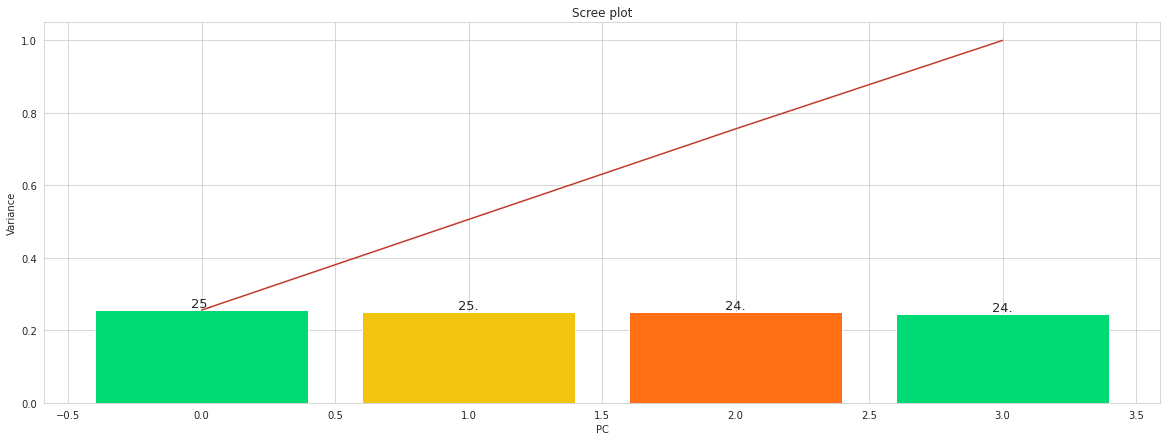

In [121]:
# scree plot으로 나타내는 함수 정의
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_) # 주성분 수 가져옴
    ind = np.arange(num_components) # num_components에 따라, 3개라면, [0,1,2]처럼 일련번호를 가져온다.
    vals = pca.explained_variance_ratio_ # 각 주성분이 설명하는 분산의 비율을 포함하는 배열
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals) # 'vals'의 누적 합 계산
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    # 각 주성분의 분산 비율을 그래프 위에 표시
    # ax.annotate : 주어진 텍스트, 좌표에 주석 추가 ax.annotate(텍스트, 좌표, va=주석의 수직정렬, ha=수평정렬)
    for i in range(num_components): # 각 주성분의 분산 비율을 그래프 위에 표시
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
    
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

주성분 3개 사용시, 74%  
주성분 4개 모두 사용시, 98%  

차원 축소해보려하였으나, 90%정도의 내용을 나타내기 위해선, 주성분 4개가 모두 중요한 것으로 보여진다.   
-> 차원축소할 필요성이 없어보인다.   
-> 열을 그대로 유지할 것이다.  

# Data Analysis

In [47]:
new_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 1. **지역에 따라서 선호하는 게임 장르가 다를까** 
    - [ ]  지역은 어떻게 구분했나요?
    - [ ]  지역별로 선호하는 게임의 장르를 파악했나요?
    - [ ]  지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

북미, 유럽, 일본, 기타 지역의 출고량 -> 많은 것을 기준으로 지역별로 선호하는 게임의 장르를 찾을 수 있을 것이다.  
우선, 각 지역별로 선호하는 게임의 종류를 살펴보자

In [48]:
new_df.groupby('Genre').sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
Genre,,,,,,
Action,6477518,7864.49,4725.49,1324.29,1092.30,15006.57
Adventure,2538280,370.57,203.13,111.71,96.36,781.77
Fighting,1661830,1028.75,1488.30,265.05,175.60,2957.70
Misc,3354172,4150.20,2344.86,333.29,202.08,7030.43
Platform,1733320,3747.24,1481.78,338.43,390.67,5958.12
Puzzle,1118892,180.93,99.98,56.19,12.34,349.44
Racing,2423860,5831.62,862.16,315.14,415.81,7424.73
Role-Playing,2924257,1515.48,204.70,4154.47,783.09,6657.74
Shooter,2543486,3209.76,3641.14,77.28,440.08,7368.26


In [49]:
NA_Genre = new_df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
EU_Genre = new_df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
JP_Genre = new_df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
Other_Genre = new_df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

In [50]:
print('북미지역의 Top4 Genre는', NA_Genre[:4].index.values)
print('유럽지역의 Top4 Genre는', EU_Genre[:4].index.values)
print('일본지역의 Top4 Genre는', JP_Genre[:4].index.values)
print('기타지역의 Top4 Genre는', Other_Genre[:4].index.values)

북미지역의 Top4 Genre는 ['Action' 'Racing' 'Misc' 'Platform']
유럽지역의 Top4 Genre는 ['Action' 'Shooter' 'Misc' 'Fighting']
일본지역의 Top4 Genre는 ['Role-Playing' 'Action' 'Simulation' 'Sports']
기타지역의 Top4 Genre는 ['Action' 'Role-Playing' 'Sports' 'Shooter']


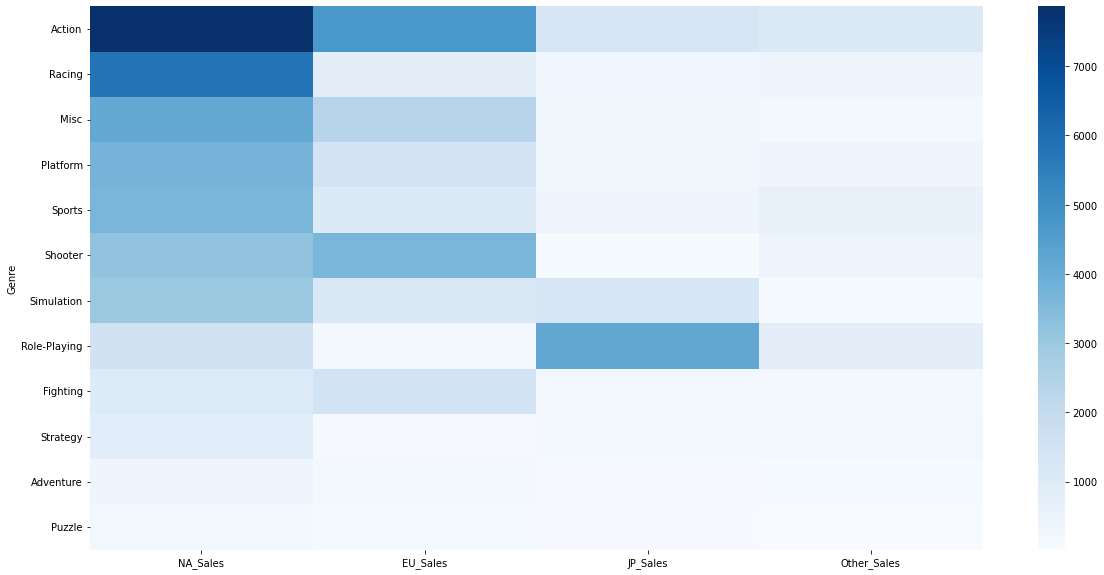

In [52]:
# heatmap 이용 (전체)
fig, ax = plt.subplots(figsize=(20,10))
genre = pd.concat([NA_Genre, EU_Genre, JP_Genre, Other_Genre], axis=1)
sns.heatmap(genre, cmap='Blues');

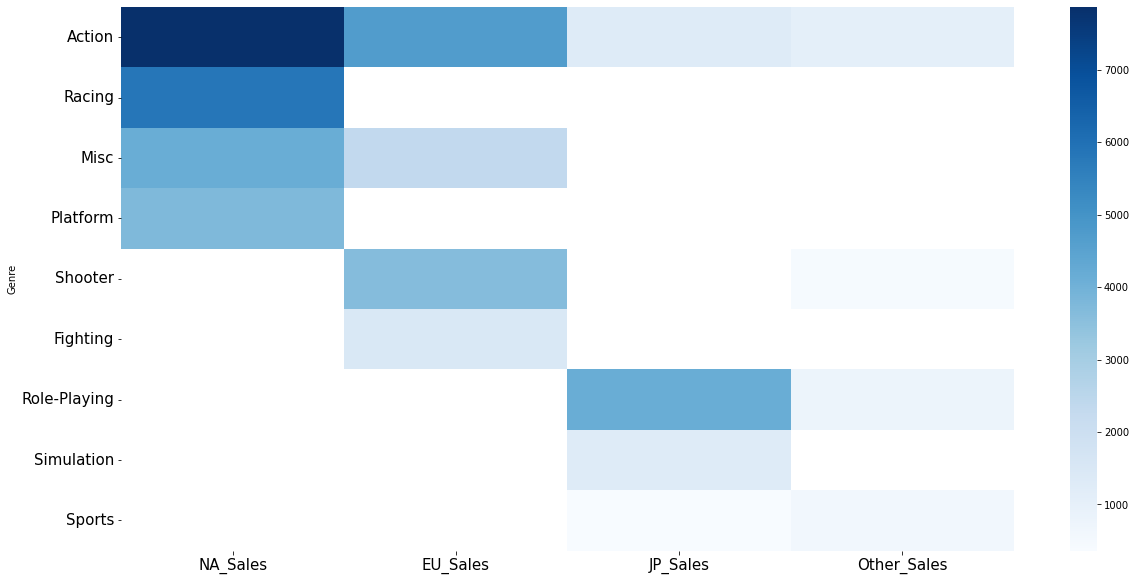

In [53]:
# Top4
fig, ax = plt.subplots(figsize=(20,10))
genre = pd.concat([NA_Genre[:4], EU_Genre[:4], JP_Genre[:4], Other_Genre[:4]], axis=1)
sns.heatmap(genre, cmap='Blues', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=15)
ax.tick_params(axis='x', labelsize=15)

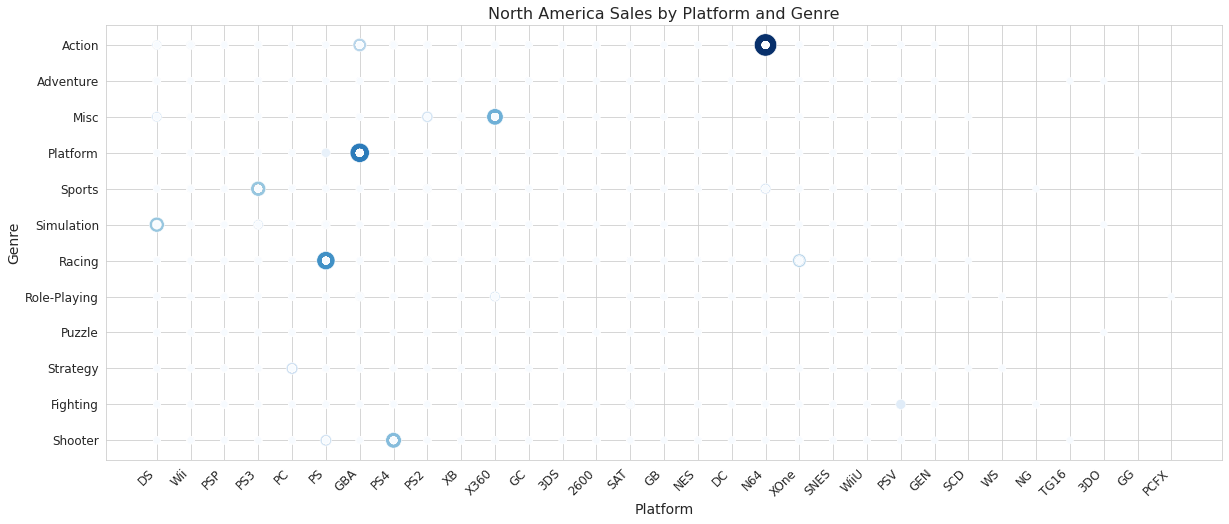

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sns.scatterplot(data=new_df, x='Platform', y='Genre', hue='NA_Sales', size='NA_Sales', sizes=(50, 500),
                palette='Blues', legend=False)
plt.title('North America Sales by Platform and Genre', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12);

그렇다면, 각 지역별로 선호하는 플랫폼의 종류를 보자.  
플랫폼의 종류와 방금 구한 지역별 게임 장르와도 관계성이 있을까?


In [58]:
NA_Plat = new_df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)[:5]
EU_Plat = new_df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)[:5]
JP_Plat = new_df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False)[:5]
Other_Plat = new_df.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=False)[:5]

In [59]:
print('북미지역의 Top4 Platform은', NA_Plat[:4].index.values)
print('유럽지역의 Top4 Platform은', EU_Plat[:4].index.values)
print('일본지역의 Top4 Platform은', JP_Plat[:4].index.values)
print('기타지역의 Top4 Platform은', Other_Plat[:4].index.values)

북미지역의 Top4 Platform은 ['PS' 'GBA' 'N64' 'DS']
유럽지역의 Top4 Platform은 ['PS3' 'X360' 'PS2' 'PS']
일본지역의 Top4 Platform은 ['PS' 'PS2' 'PSP' 'Wii']
기타지역의 Top4 Platform은 ['X360' 'PS2' 'PS3' 'PS4']


*  지역별 게임 장르, 지역별 플랫폼 간의 연관성 확인 

In [60]:
na_genre_plat = pd.crosstab(index=new_df[new_df['Genre'].isin(NA_Genre[:4].index.values)]['Genre'], columns=new_df[new_df['Platform'].isin(NA_Plat[:4].index.values)]['Platform'])
eu_genre_plat = pd.crosstab(index=new_df[new_df['Genre'].isin(EU_Genre[:4].index.values)]['Genre'], columns=new_df[new_df['Platform'].isin(EU_Plat[:4].index.values)]['Platform'])
jp_genre_plat = pd.crosstab(index=new_df[new_df['Genre'].isin(JP_Genre[:4].index.values)]['Genre'], columns=new_df[new_df['Platform'].isin(JP_Plat[:4].index.values)]['Platform'])
other_genre_plat = pd.crosstab(index=new_df[new_df['Genre'].isin(Other_Genre[:4].index.values)]['Genre'], columns=new_df[new_df['Platform'].isin(Other_Plat[:4].index.values)]['Platform'])

In [61]:
other_genre_plat

Platform,PS2,PS3,PS4,X360
Genre,,,,
Action,341,368,121,318
Role-Playing,182,116,47,74
Shooter,157,154,33,195
Sports,388,210,42,215


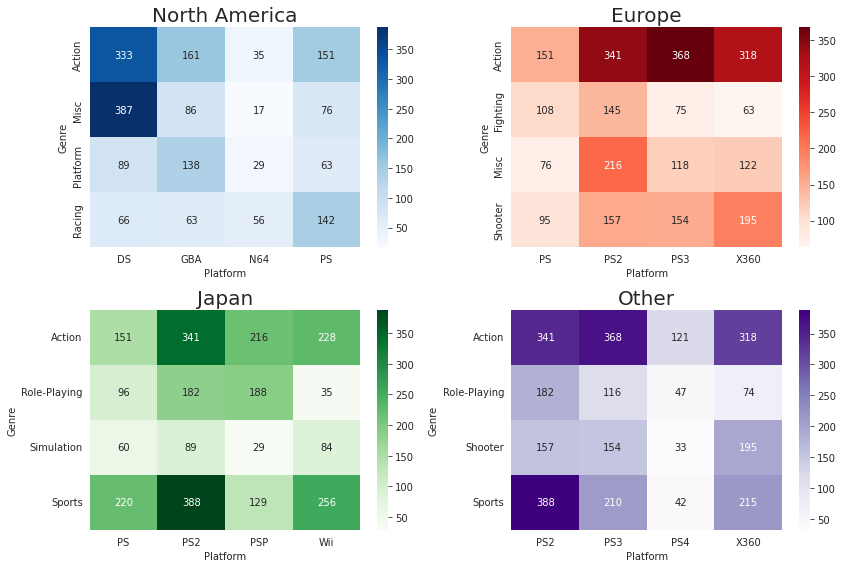

In [62]:
# 4개 지역의 시각화를 한번에 출력 
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.heatmap(data=na_genre_plat, cmap='Blues', annot=True, fmt='d', ax=axes[0, 0])
sns.heatmap(data=eu_genre_plat, cmap='Reds', annot=True, fmt='d', ax=axes[0, 1])
sns.heatmap(data=jp_genre_plat, cmap='Greens', annot=True, fmt='d', ax=axes[1, 0])
sns.heatmap(data=other_genre_plat, cmap='Purples', annot=True, fmt='d', ax=axes[1, 1])
axes[0, 0].set_title('North America', fontsize=20)
axes[0, 1].set_title('Europe', fontsize=20)
axes[1, 0].set_title('Japan', fontsize=20)
axes[1, 1].set_title('Other', fontsize=20)
plt.tight_layout()
plt.show()

* 지역별 게임 장르, 지역별 플랫폼 간의 상관관계는 없는 것으로 확인됨.

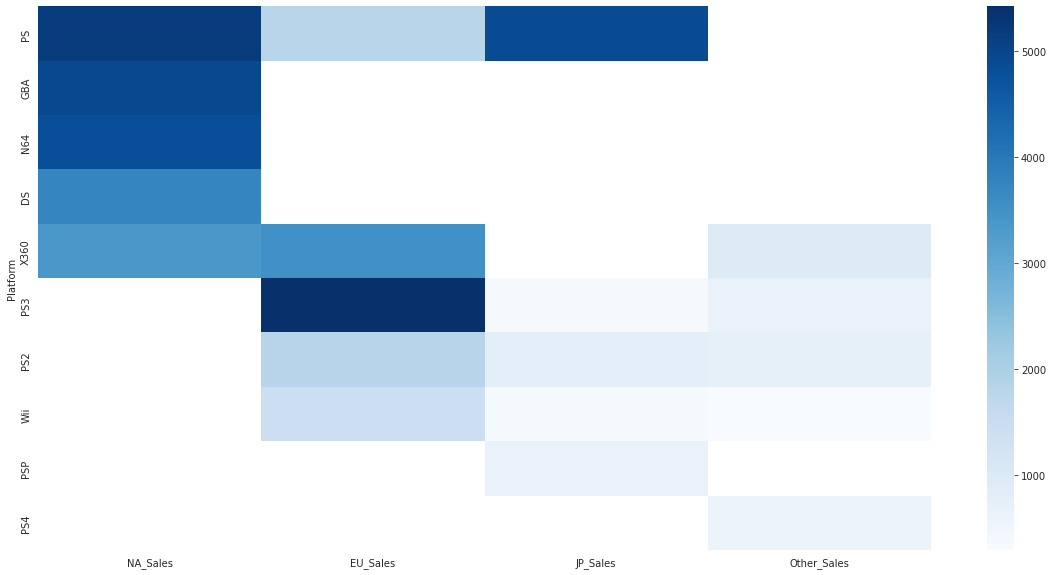

In [63]:
# heatmap 이용
fig, ax = plt.subplots(figsize=(20,10))
plat = pd.concat([NA_Plat, EU_Plat, JP_Plat, Other_Plat], axis=1)
sns.heatmap(plat, cmap='Blues');

북미지역과 일본지역이 PS라는 플랫폼을 가장 많이 사용하는 것으로 보였다.  
아까  살펴봤듯이 북미지역에서는 액션 장르가 제일 많이 나갔고, 일본지역에서는 역할극 장르가 제일 많이 나갔었다.  
그럼 플랫폼과 장르 사이에서의 관계성이 없다고 보는 건가?  
플램폼, 장르의 관계성을 확인해보자!

* Genre
  - 북미지역 : ['Action' 'Racing' 'Misc' 'Platform']
  - 유럽지역 : ['Action' 'Shooter' 'Misc' 'Fighting']
  - 일본지역 : ['Role-Playing' 'Action' 'Simulation' 'Sports']
  - 기타지역의 : ['Action' 'Role-Playing' 'Sports' 'Shooter']

* Platform
  - 북미지역 : ['PS' 'GBA' 'N64' 'DS']
  - 유럽지역 : ['PS3' 'X360' 'PS2' 'PS']
  - 일본지역 : ['PS' 'PS2' 'PSP' 'Wii']
  - 기타지역 : ['X360' 'PS2' 'PS3' 'PS4']

장르에서는 Action이 많이 등장하며, 플랫폼에서는 PS시리즈가 많이 등장한다.  
그렇다면, PS 플랫폼이 Action 장르를 주로 하는 것인가? 확인해보자

In [64]:
ps_games = new_df[new_df['Platform'].isin(['PS', 'PS2','PS3','PS4'])]
ps_genre_counts = ps_games['Genre'].value_counts()
ps_genre_counts

Action          981
Sports          860
Racing          456
Role-Playing    441
Shooter         439
Misc            425
Adventure       350
Fighting        345
Platform        209
Simulation      184
Strategy        167
Puzzle           53
Name: Genre, dtype: int64

PS 플랫폼이 Action 장르만 주로 하는 것은 아니었다. Action, Sports가 비슷하게 많으며, 다양한 종류를 모두 다루고 있는 플랫폼이었다.

플랫폼, 장르는 상관관계가 없어보인다. 각 플랫폼마다 특정한 장르를 많이하기보다는, 각 플랫폼마다 다양한 장르를 가지고 있다.

* 게임 장르 별 출판사 수

In [65]:
publisher_genre = new_df.groupby('Genre')['Publisher'].size().sort_values(ascending=False).reset_index()

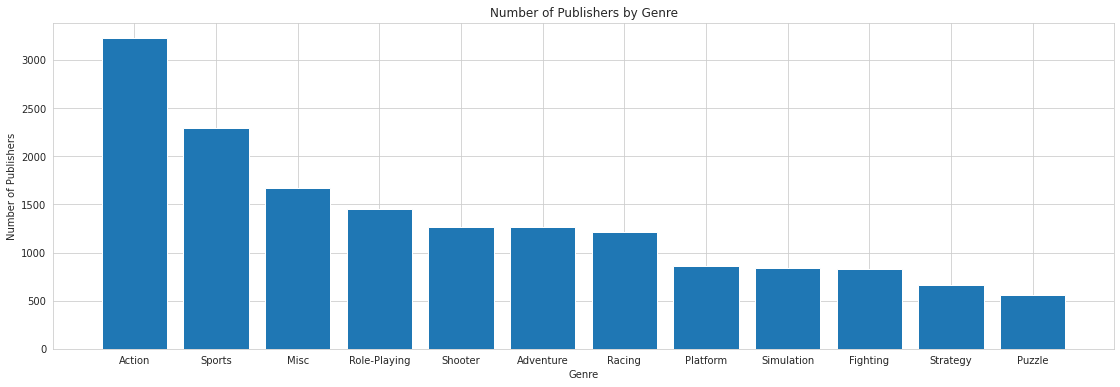

In [66]:
plt.figure(figsize=(19, 6))
plt.bar(publisher_genre['Genre'], publisher_genre['Publisher'])
plt.title('Number of Publishers by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Publishers')
plt.xticks(rotation=0)
plt.show()

Action 장르가 출판사가 가장 많다. 그 다음으로는 Sports, Misc, Role-Playing 등이 있다.

그렇다면, Action 장르가 다음 기수 게임의 장르가 될 가능성이 늘고있는데, Action 장르에 대해 더 구체적으로 살펴보자.  
Action 장르에서 어떤 출판사가 가장 많이 쓰였나?  

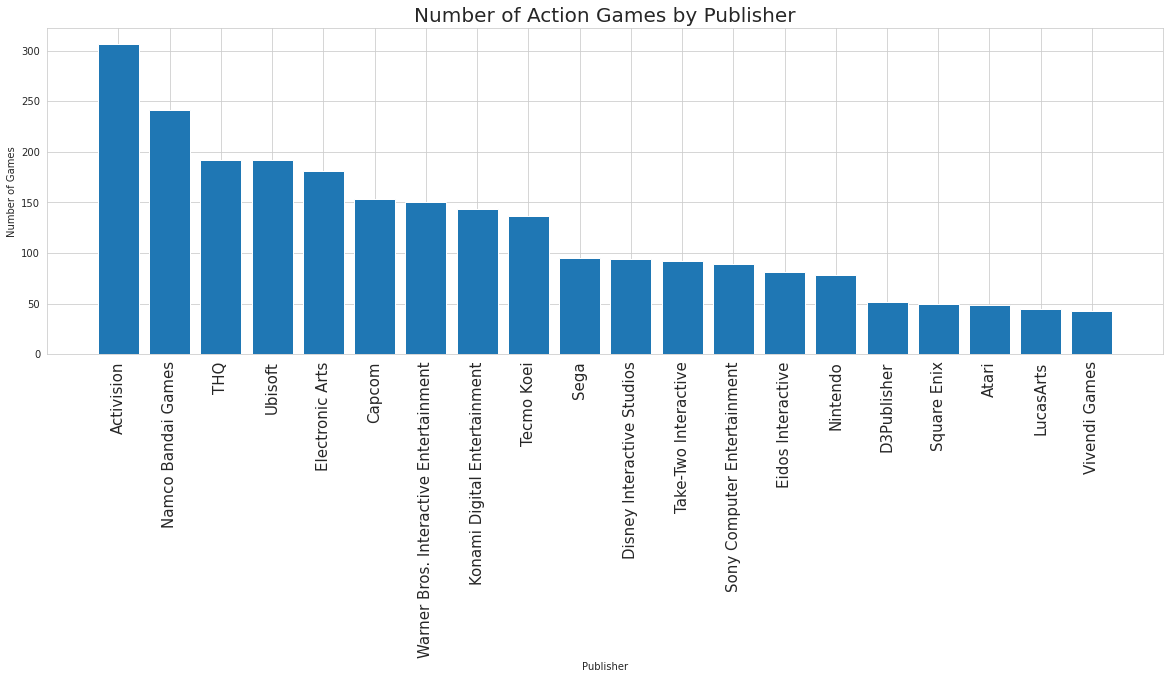

In [67]:
# 액션(Action) 장르에서 출판된 게임들의 출판사(Publisher)별 게임 수 계산
action_publisher_counts = new_df[new_df['Genre'] == 'Action']['Publisher'].value_counts()[:20]

# 시각화
plt.figure(figsize=(20, 6))
plt.bar(action_publisher_counts.index, action_publisher_counts.values)
plt.title('Number of Action Games by Publisher', fontsize=20)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [68]:
action_publisher_counts.index[:4]

Index(['Activision', 'Namco Bandai Games', 'THQ', 'Ubisoft'], dtype='object')

**Action 장르에서 어떤 출판사가 가장 많이 쓰였나?**

'Activision', 'Namco Bandai Games', 'THQ', 'Ubisoft’가 주로 많이 쓰였다.

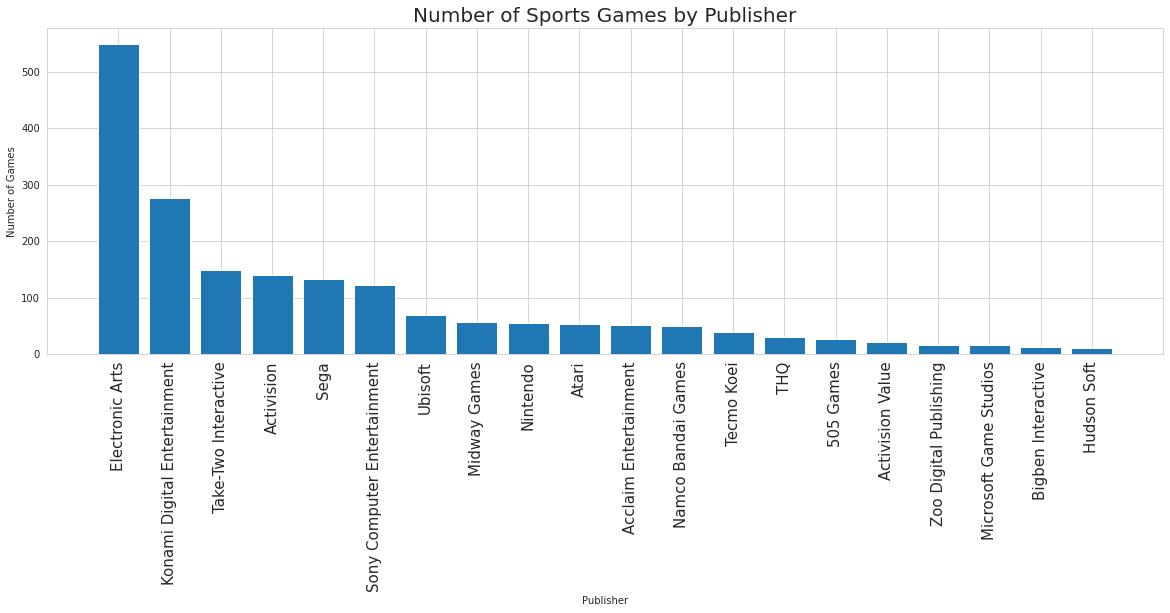

In [69]:
# 스포츠(Sports) 장르에서 출판된 게임들의 출판사(Publisher)별 게임 수 계산
sports_publisher_counts = new_df[new_df['Genre'] == 'Sports']['Publisher'].value_counts()[:20]

# 시각화
plt.figure(figsize=(20, 6))
plt.bar(sports_publisher_counts.index, sports_publisher_counts.values)
plt.title('Number of Sports Games by Publisher', fontsize=20)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [70]:
sports_publisher_counts.index[:4]

Index(['Electronic Arts', 'Konami Digital Entertainment',
       'Take-Two Interactive', 'Activision'],
      dtype='object')

**Sports 장르에서 어떤 출판사가 가장 많이 쓰였나?**

Electronic Arts가 유독 많이 쓰여보인다.

'Electronic Arts', 'Konami Digital Entertainment',
'Take-Two Interactive', 'Activision'



> Data Analysis 1 결론 : Action 장르의 게임은 지역별 선호도가 가장 높고, 출판사 수도 가장 많다.



## **연도별 게임의 트렌드가 있을까**
    - [ ]  트렌드는 어떤 것을 기준으로 파악했나요?
    - [ ]  연도별로 트렌드가 존재하나요?
    - [ ]  왜 존재한다/존재하지 않는다고 생각했나요?

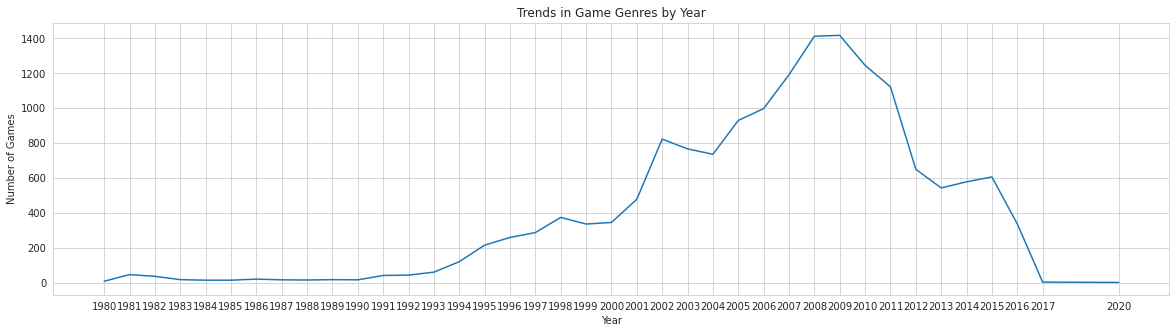

In [74]:
# 연도 별 장르 수 시각화
year_genre_count = new_df.groupby('Year')['Genre'].count()

plt.figure(figsize=(20,5))
plt.plot(year_genre_count.index, year_genre_count.values)

# 그래프 제목과 축 이름 설정
plt.title('Trends in Game Genres by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')

# x축 눈금 간격 설정
plt.xticks(year_genre_count.index, rotation=0)

# 그래프 표시
plt.show()

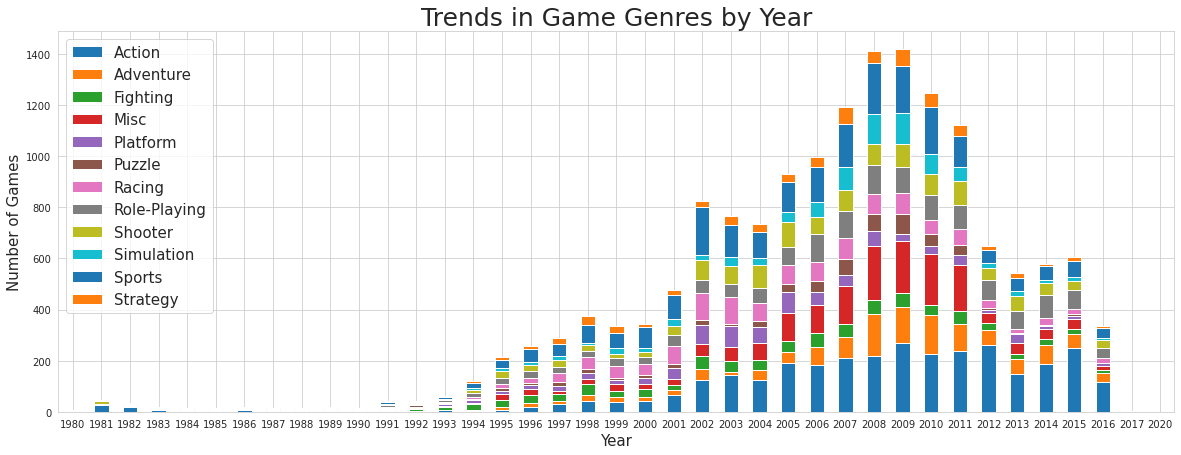

In [75]:
# 연도별 어떤 장르가 가장 많았는지 시각화
mpl.rcParams['figure.figsize'] = (20,7)
year_genre_count = new_df.groupby('Year')['Genre'].value_counts().unstack()
year_genre_count.plot(kind='bar', stacked=True)
plt.title('Trends in Game Genres by Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Games', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(rotation=0);

2008, 2009년에 게임 트렌드가 제일 활발함.  
전체적으로 action 장르의 게임은 꾸준히 많이 나옴.

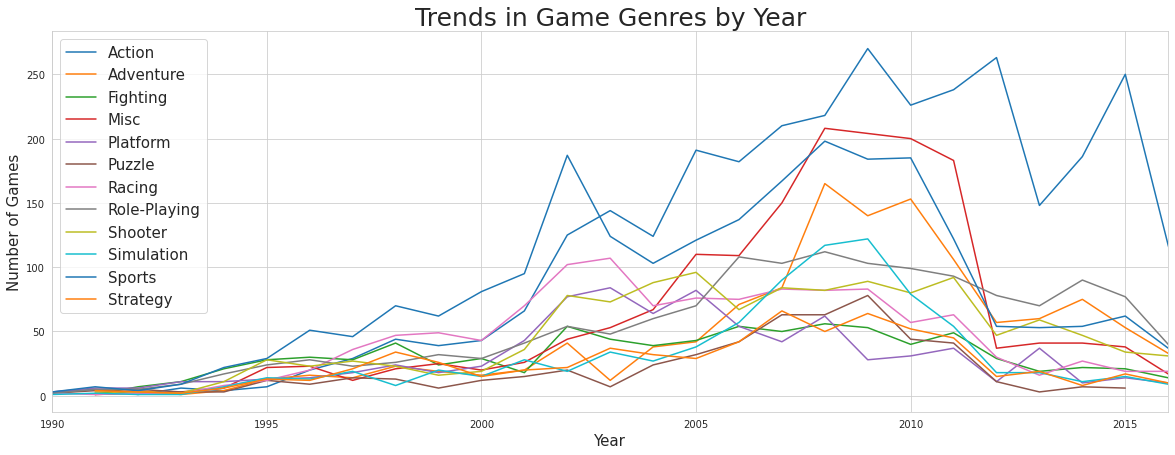

In [76]:
mpl.rcParams['figure.figsize'] = (20,7)
year_genre_count = new_df.groupby('Year')['Genre'].value_counts().unstack()
year_genre_count.plot(kind='line')
plt.xlim(1990,2016)
plt.title('Trends in Game Genres by Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Games', fontsize=15)
plt.legend(loc='upper left', fontsize=15)

plt.xticks(rotation=0)
plt.show()

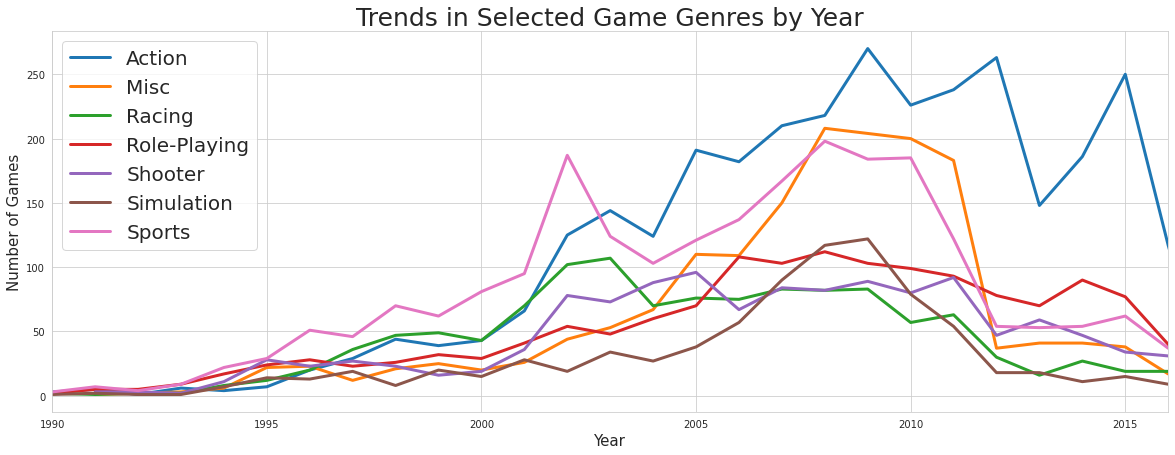

In [78]:
# 장르 중 action, adventure, misc, racing, simulation, sports 열만 추출
selected_genres = ['Action', 'Misc', 'Racing', 'Simulation', 'Sports', 'Role-Playing', 'Shooter']
df_selected = new_df[new_df['Genre'].isin(selected_genres)]

# 연도별로 장르 개수 집계
year_genre_count = df_selected.groupby('Year')['Genre'].value_counts().unstack()

# 시각화
year_genre_count.plot(kind='line', figsize=(20,7), linewidth=3)
plt.xlim(1990, 2016)
plt.title('Trends in Selected Game Genres by Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Games', fontsize=15)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(rotation=0);

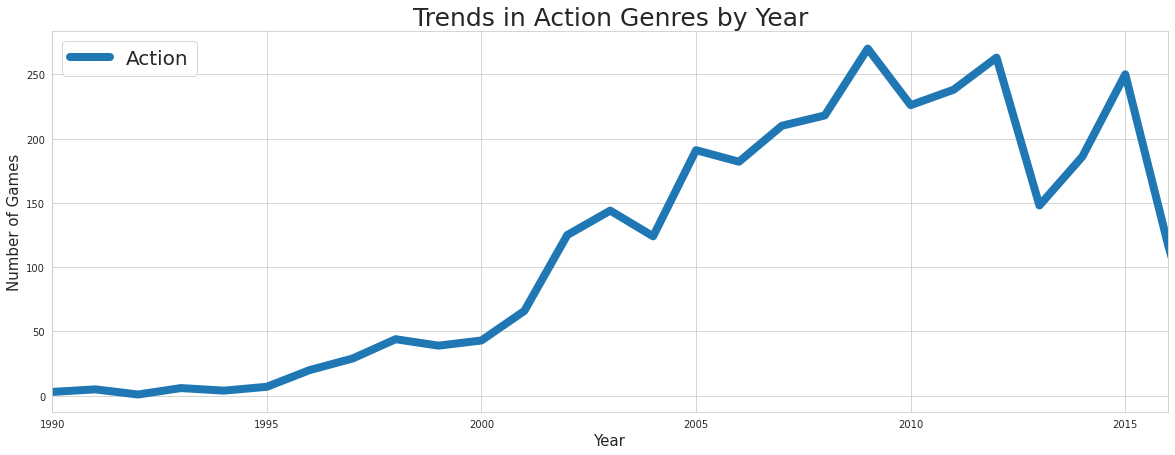

In [79]:
# action만 나타내주기
year_genre_count = new_df[new_df['Genre']=='Action'].groupby('Year')['Genre'].value_counts().unstack()
year_genre_count.plot(kind='line', figsize=(20,7), linewidth=8)
plt.xlim(1990, 2016)
plt.title('Trends in Action Genres by Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Games', fontsize=15)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(rotation=0);

연도에 따른 출판사 빈도 알아보자.

In [80]:
new_df.groupby('Year')['Publisher'].value_counts().sort_values(ascending=False).head(10)

Year  Publisher      
2009  Activision         120
2008  Electronic Arts    119
2005  Electronic Arts    117
2009  Electronic Arts    112
2008  Ubisoft            109
2007  Electronic Arts    106
2006  Electronic Arts    102
2009  Ubisoft            101
2010  Activision          89
2007  Ubisoft             88
Name: Publisher, dtype: int64

In [81]:
# 출판사별 총 발행량 계산 후, 총 발행량에 따른 상위 5개 출판사 추출출
publisher_sales = new_df.groupby('Publisher')['Sales'].sum()
top_publishers = publisher_sales.sort_values(ascending=False)[:5].index.tolist()
top_publishers

['Nintendo',
 'Electronic Arts',
 'Activision',
 'Sony Computer Entertainment',
 'Ubisoft']

* 상위 5개 출판사별 총 판매량 시각화  
상위 5개의 출판사를 보면, 트렌드를 따른다는 확실한 증거가 나온다.  
각 년도 별 총 판매량이 들쑥날쑥한 것을 보면 몇년도에 유행인지 확실히 보임.

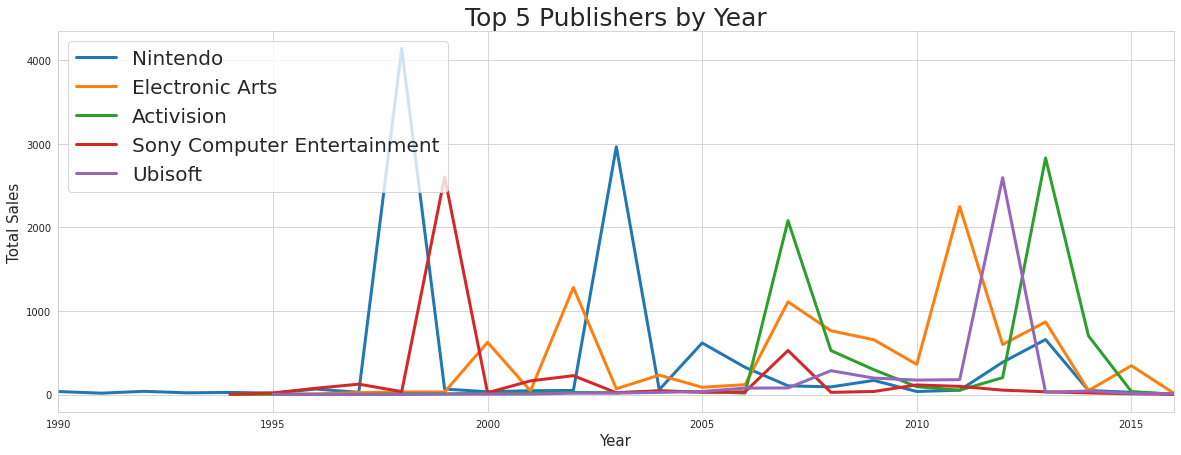

In [82]:
year_publisher_sales = new_df[new_df['Publisher'].isin(top_publishers)].groupby(['Year', 'Publisher'])['Sales'].sum().unstack()
year_publisher_count = new_df[new_df['Publisher'].isin(top_publishers)].groupby(['Year', 'Publisher'])['Name'].count().unstack()

fig, ax1 = plt.subplots(figsize=(20,7))

# 출판사별 총 판매량 시각화
for publisher in top_publishers:
    ax1.plot(year_publisher_sales.index, year_publisher_sales[publisher], linewidth=3, label=publisher)
ax1.set_xlim(1990, 2016)
ax1.set_xlabel('Year', fontsize=15)
plt.title('Top 5 Publishers by Year', fontsize=25)
ax1.set_ylabel('Total Sales', fontsize=15)
ax1.legend(fontsize=20, loc='upper left');

상위 5개 출판사별 게임 수 시각화

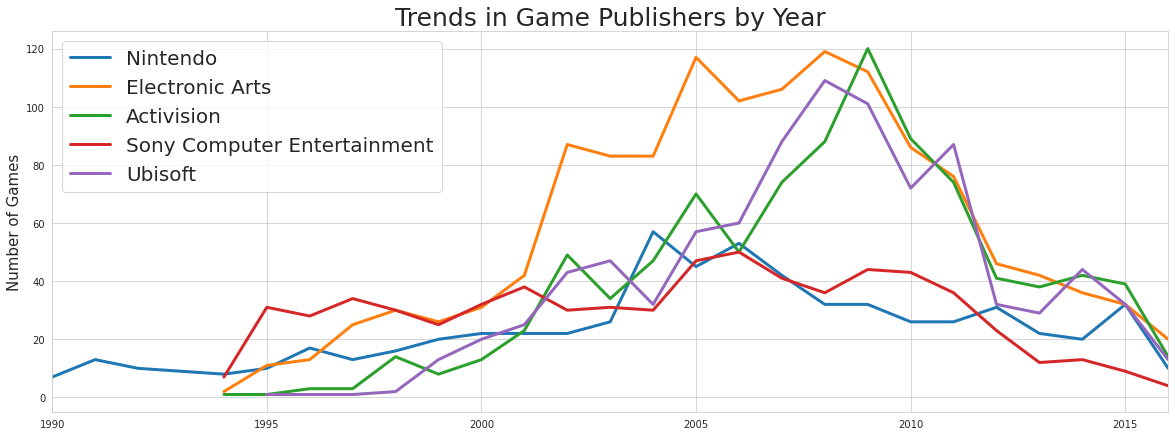

In [84]:
# 출판사 별 게임 수 시각화
fig, ax = plt.subplots(figsize=(20,7))
for publisher in top_publishers:
    ax.plot(year_publisher_count.index, year_publisher_count[publisher], linewidth=3, label=publisher)
ax.set_ylabel('Number of Games', fontsize=15)
ax.legend(fontsize=20, loc='upper left')
ax.set_xlim(1990, 2016)
plt.title('Trends in Game Publishers by Year', fontsize=25)
plt.xticks(rotation=0);



> Data Analysis 2 결론 : 연도별 게임 장르와 출판사 확인 결과,  연도별로 게임의 트렌드가 바뀐다.



## **인기가 많은 게임에 대한 분석 및 시각화 프로세스**
    - [ ]  인기가 많다는 것을 어떻게 정의했나요?
    - [ ]  해당 게임이 왜 인기가 많다고 생각했나요?
    - [ ]  시각화를 통해 무엇을 나타내고자 하는지를 고려했나요? 파라미터를 조정 (제목, 축이름 필수, 그 외 파라미터는 선택사항)
    - [ ]  해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

* 인기가 많다 
  * Name은 고유한 이름마저 11238개로 너무 많아 인기 식별 불가능
  * Sales가 가장 많이 판매된 것이 인기가 많겠지!

In [85]:
new_df.nunique()

Name           11238
Platform          31
Year              39
Genre             12
Publisher        573
NA_Sales         442
EU_Sales         328
JP_Sales         256
Other_Sales      170
Sales           1169
dtype: int64

In [86]:
new_df.sort_values(by='Sales', ascending=False)['Name']

1964                  The Legend of Zelda: Ocarina of Time
9829                                   Super Mario Bros. 3
3589                                      Final Fantasy IX
13935                                    Crash Team Racing
1629                                  Assassin's Creed III
                               ...                        
5501     Hisshou Pachinko*Pachi-Slot Kouryaku Series DS...
5598      SCORE International Baja 1000: The Official Game
3599                                    Ketsui Death Label
9548                               Reader Rabbit 1st Grade
9961     Sansuu Puzzle de Migaku: Gakken Otona no Shiko...
Name: Name, Length: 16141, dtype: object

In [87]:
# 출고량이 제일 많은 게임 1위부터.
best_game_sell = new_df.sort_values(by='Sales', ascending=False)['Name']
best_game_sell[:10]

1964     The Legend of Zelda: Ocarina of Time
9829                      Super Mario Bros. 3
3589                         Final Fantasy IX
13935                       Crash Team Racing
1629                     Assassin's Creed III
8010                            Battlefield 3
11996                          Guitar Hero II
9791                     Call of Duty: Ghosts
4978      Cooking Mama 2: Dinner With Friends
6929                                 NBA 2K12
Name: Name, dtype: object

In [88]:
new_df[new_df['Name']=='The Legend of Zelda: Ocarina of Time']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
1964,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100.00,1.89,1.45,0.16,4103.50
3148,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.22


출고량 많았던 것 몇 개 뽑아와서 몇 년간 인기가 지속되었는지 보자.

In [89]:
# 우선 50개 뽑아봄.
total_best50=[]
best50 = best_game_sell[:50].values
for i in best50:
  total_best50.append(new_df[new_df['Name']==i])


In [90]:
total_best50[0]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
1964,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100.00,1.89,1.45,0.16,4103.50
3148,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.22


In [298]:
total_best50[1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
9829,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930.00,1.25,0.83,0.20,2932.28
14856,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28


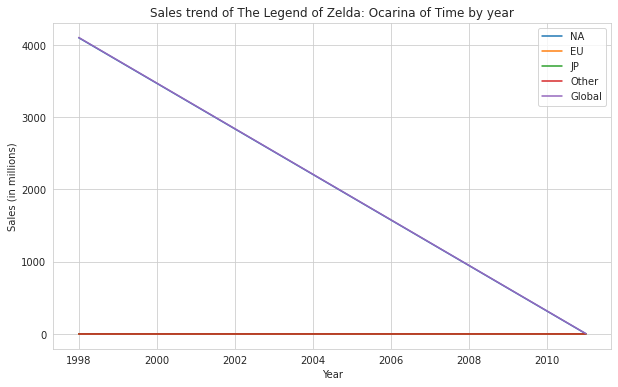

In [91]:
# 연도별 특정 게임의 판매량 추이 그래프
def plot_game_sales_by_year(game_name):
    game_df = new_df[new_df['Name']==game_name]
    if game_df.empty:
        print(f"{game_name} not found in the dataset!")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(game_df['Year'], game_df['NA_Sales'], label='NA')
    plt.plot(game_df['Year'], game_df['EU_Sales'], label='EU')
    plt.plot(game_df['Year'], game_df['JP_Sales'], label='JP')
    plt.plot(game_df['Year'], game_df['Other_Sales'], label='Other')
    plt.plot(game_df['Year'], game_df['Sales'], label='Global')
    plt.title(f"Sales trend of {game_name} by year")
    plt.xlabel("Year")
    plt.ylabel("Sales (in millions)")
    plt.legend()
    plt.show()

plot_game_sales_by_year("The Legend of Zelda: Ocarina of Time")

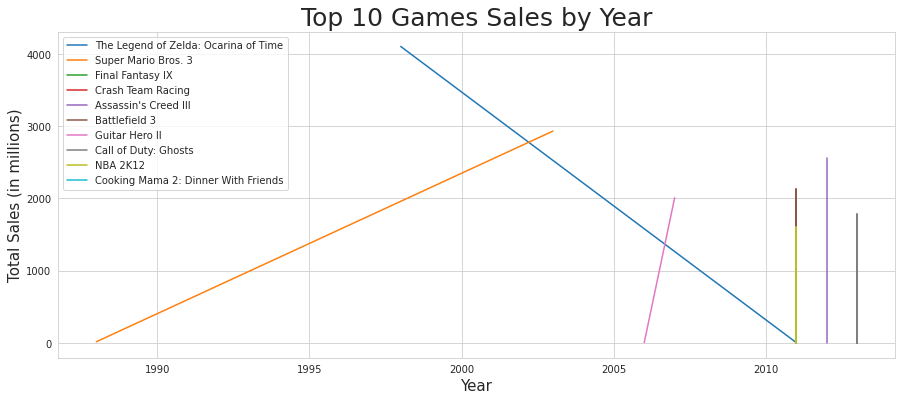

In [93]:
# 상위 10개 게임 판매량 추이 그래프프
best_game_sell = new_df.groupby('Name')['Sales'].sum().sort_values(ascending=False)[:10]
game_list = []

for game_name in best_game_sell.index:
    game_df = new_df[new_df['Name']==game_name].sort_values(by='Year')
    game_list.append(game_df)

fig, ax = plt.subplots(figsize=(15, 6))

for i, game_df in enumerate(game_list):
    ax.plot(game_df['Year'], game_df['Sales'], label=best_game_sell.index[i])

ax.legend(loc='upper left')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total Sales (in millions)', fontsize=15)
ax.set_title('Top 10 Games Sales by Year', fontsize=25);

상위 10개의 게임 중, 연도에 따른 게임 순위를 알아보았다.  
연도에 따라 증가, 감소하는 것이 확연히 보여진다.  
추가적으로 연도축에 수직으로 되어있는 게임들은 판매량의 차이가 있어도 연도가 추가적으로 다른 데이터가 없는 것으로 보여진다.

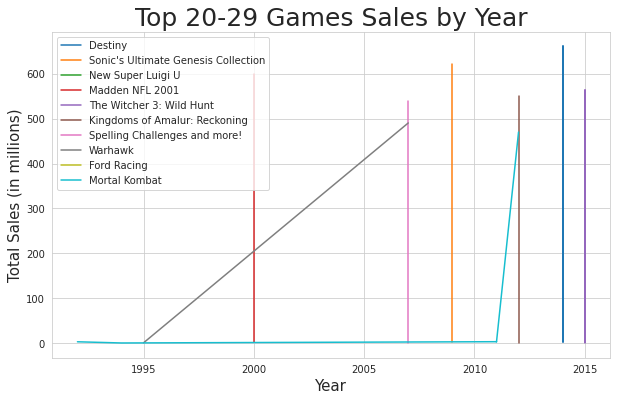

In [97]:
best_game_sell = new_df.groupby('Name')['Sales'].sum().sort_values(ascending=False)[20:30]
game_list = []

for game_name in best_game_sell.index:
    game_df = new_df[new_df['Name']==game_name].sort_values(by='Year')
    game_list.append(game_df)

fig, ax = plt.subplots(figsize=(10, 6))

for i, game_df in enumerate(game_list):
    ax.plot(game_df['Year'], game_df['Sales'], label=best_game_sell.index[i])

ax.legend(loc='upper left')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total Sales (in millions)', fontsize=15)
ax.set_title('Top 20-29 Games Sales by Year', fontsize=25)
plt.show()

# 가설 검정

출고량 많았던 것 몇 개 뽑아와서 몇 년간 인기가 지속되었는지도 알 수 있고,   
평균적으로 인기가 지속되는 시간을 가설검정을 통해 다음 기수 게임을 예측하는데 사용해서 결론내보자!!!!

In [98]:
top_10000_games = new_df.sort_values(by='Sales', ascending=False).head(10000)

# 중복되는 게임 : 4814rows
duplicate_games = top_10000_games[top_10000_games.duplicated(subset=['Name'], keep=False)]
duplicate_games.shape

(4814, 10)

In [99]:
duplicate_games.query('Name == "The Legend of Zelda: Ocarina of Time"') 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
1964,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100.00,1.89,1.45,0.16,4103.50
3148,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.22


In [100]:
def get_game_years(duplicate_games):
    game_years = pd.DataFrame(columns=['Game', 'Year1', 'Year2', 'Year_Diff'])

    for game_name in duplicate_games.Name.unique():
        game = duplicate_games[duplicate_games.Name == game_name]
        year1 = game.Year.min()
        year2 = game.Year.max()
        year_diff = year2 - year1
        game_years = game_years.append({'Game': game_name, 'Year1': year1, 'Year2': year2, 'Year_Diff': year_diff}, ignore_index=True)

    return game_years

result = get_game_years(duplicate_games)

In [101]:
result.head()

,Game,Year1,Year2,Year_Diff
0,The Legend of Zelda: Ocarina of Time,1998,2011,13
1,Super Mario Bros. 3,1988,2003,15
2,Assassin's Creed III,2012,2012,0
3,Battlefield 3,2011,2011,0
4,Guitar Hero II,2006,2007,1


In [102]:
new_df2 = get_game_years(new_df)

In [103]:
new_df2 = new_df2.rename(columns={'Game': 'Name'})
new_df2.head()

,Name,Year1,Year2,Year_Diff
0,Candace Kane's Candy Factory,2008,2008,0
1,The Munchables,2009,2009,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,2010,0
3,Deal or No Deal: Special Edition,2010,2010,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,2010,0


In [105]:
new_df3 = pd.merge(new_df, new_df2, on='Name')
new_df3.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Year1,Year2,Year_Diff
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00,0.04,2008,2008,0
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,0.0,0.00,0.01,0.15,2008,2008,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18,2009,2009,0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02,2010,2010,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.0,0.00,0.00,0.04,2010,2010,0


평균 인기 지속 기간에 대한 가설 검정을 해보겠습니다.

가설 설정:
* H0 (귀무가설): 다음 분기의 게임들의 평균 인기 지속 기간은 현재까지 출시된 게임들의 평균 인기 지속 기간과 차이가 없다.  

* H1 (대립가설): 다음 분기의 게임들의 평균 인기 지속 기간은 현재까지 출시된 게임들의 평균 인기 지속 기간과 차이가 있다.

In [106]:
# 무작위로 20개의 게임 추출
sample_games = result.sample(n=20, random_state=42, replace=True)

# 추출한 게임들의 평균 인기 지속 기간 계산
sample_mean = np.mean(sample_games.Year_Diff)

# 이전에 출시된 게임들의 평균 인기 지속 기간 계산
pop_mean = np.mean(result.Year_Diff)

sample_games['Year_Diff'] = sample_games['Year_Diff'].astype(int)

# 가설 검정 수행
t_stat, p_val = stats.ttest_1samp(sample_games.Year_Diff, pop_mean)

# 결과 출력
print("Sample Mean: {:.2f}".format(sample_mean))
print("Population Mean: {:.2f}".format(pop_mean))
print("t-statistic: {:.2f}".format(t_stat))
print("p-value: {:.5f}".format(p_val))

alpha = 0.05
if p_val < alpha:
    print("다음 분기의 게임들의 평균 인기 지속 기간은 현재까지 출시된 게임들의 평균 인기 지속 기간과 차이가 있다. ")
else:
    print("다음 분기의 게임들의 평균 인기 지속 기간은 현재까지 출시된 게임들의 평균 인기 지속 기간과 차이가 없다. ")

Sample Mean: 1.50
Population Mean: 0.80
t-statistic: 0.78
p-value: 0.44629
다음 분기의 게임들의 평균 인기 지속 기간은 현재까지 출시된 게임들의 평균 인기 지속 기간과 차이가 없다. 




> **즉, 이전에 출시된 게임들과 다음 분기에 출시될 게임들의 평균 인기 지속 기간 간에는 차이가 없없을 것으로 예측할 수 있습니다.**

그렇다면, 다음 분기 게임의 지속성을 예측할 때 지속 기간이 어느 정도인 것으로 잡아야 할까요?

* H0 (귀무 가설): 다음 분기에 출시될 게임들의 평균 인기 지속 기간은 2 이하이다.

* H1 (대립 가설): 다음 분기에 출시될 게임들의 평균 인기 지속 기간은 2보다 크다.

In [107]:
# 무작위로 20개의 게임 추출
sample_games = result.sample(n=20, random_state=42, replace=True)

# 추출한 게임들의 평균 인기 지속 기간 계산
sample_mean = np.mean(sample_games.Year_Diff)

# 이전에 출시된 게임들의 평균 인기 지속 기간 계산
pop_mean = 2

# 가설 검정 수행
z_stat = (sample_mean - pop_mean) / (np.std(result.Year_Diff) / np.sqrt(len(sample_games)))
p_val = norm.sf(abs(z_stat))

# 결과 출력
print("Sample Mean: {:.2f}".format(sample_mean))
print("Population Mean: {:.2f}".format(pop_mean))
print("z-statistic: {:.2f}".format(z_stat))
print("p-value: {:.5f}".format(p_val))
if p_val < 0.05:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 2보다 크다.')
else:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 2보다 작다.')

Sample Mean: 1.50
Population Mean: 2.00
z-statistic: -0.85
p-value: 0.19719
다음 분기에 출시될 게임들의 평균 지속 기간은 2보다 작다.


In [108]:
# 무작위로 20개의 게임 추출
sample_games = result.sample(n=20, random_state=42, replace=True)

# 추출한 게임들의 평균 인기 지속 기간 계산
sample_mean = np.mean(sample_games.Year_Diff)

# 이전에 출시된 게임들의 평균 인기 지속 기간 계산
pop_mean = 1

# 가설 검정 수행
z_stat = (sample_mean - pop_mean) / (np.std(result.Year_Diff) / np.sqrt(len(sample_games)))
p_val = norm.sf(abs(z_stat))

# 결과 출력
print("Sample Mean: {:.2f}".format(sample_mean))
print("Population Mean: {:.2f}".format(pop_mean))
print("z-statistic: {:.2f}".format(z_stat))
print("p-value: {:.5f}".format(p_val))
if p_val < 0.05:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 1보다 크다.')
else:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 1보다 작다.')

Sample Mean: 1.50
Population Mean: 1.00
z-statistic: 0.85
p-value: 0.19719
다음 분기에 출시될 게임들의 평균 지속 기간은 1보다 작다.


In [109]:
# 무작위로 20개의 게임 추출
sample_games = result.sample(n=20, random_state=42, replace=True)

# 추출한 게임들의 평균 인기 지속 기간 계산
sample_mean = np.mean(sample_games.Year_Diff)



# 이전에 출시된 게임들의 평균 인기 지속 기간 계산
pop_mean = 0.5

# 가설 검정 수행
z_stat = (sample_mean - pop_mean) / (np.std(result.Year_Diff) / np.sqrt(len(sample_games)))
p_val = norm.sf(abs(z_stat))

# 결과 출력
print("Sample Mean: {:.2f}".format(sample_mean))
print("Population Mean: {:.2f}".format(pop_mean))
print("z-statistic: {:.2f}".format(z_stat))
print("p-value: {:.5f}".format(p_val))
if p_val < 0.05:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 0.5보다 크다.')
else:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 0.5보다 작다.')

Sample Mean: 1.50
Population Mean: 0.50
z-statistic: 1.70
p-value: 0.04425
다음 분기에 출시될 게임들의 평균 지속 기간은 0.5보다 크다.


In [110]:
# 무작위로 20개의 게임 추출
sample_games = result.sample(n=20, random_state=42, replace=True)

# 추출한 게임들의 평균 인기 지속 기간 계산
sample_mean = np.mean(sample_games.Year_Diff)



# 이전에 출시된 게임들의 평균 인기 지속 기간 계산
pop_mean = 0.6

# 가설 검정 수행
z_stat = (sample_mean - pop_mean) / (np.std(result.Year_Diff) / np.sqrt(len(sample_games)))
p_val = norm.sf(abs(z_stat))

# 결과 출력
print("Sample Mean: {:.2f}".format(sample_mean))
print("Population Mean: {:.2f}".format(pop_mean))
print("z-statistic: {:.2f}".format(z_stat))
print("p-value: {:.5f}".format(p_val))
if p_val < 0.05:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 0.6보다 크다.')
else:
  print('다음 분기에 출시될 게임들의 평균 지속 기간은 0.6보다 작다.')

Sample Mean: 1.50
Population Mean: 0.60
z-statistic: 1.53
p-value: 0.06263
다음 분기에 출시될 게임들의 평균 지속 기간은 0.6보다 작다.


평균 인기 지속 기간은 반년 정도로 보임.

# 결론

 * Data Analysis
    *  Action 장르의 게임은 지역별 선호도가 가장 높고, 출판사 수도 가장 많다. 
    *  트렌드도 보면 action 장르가 가장 인기있음.  
    *  Action 장르에서 출판사 'Acitivision'이 가장 많았음.
    *  PS 시리즈 플랫폼이 가장 빈번함.
 * Hypothesis Test
    * 평균인기 지속 기간 반년인 것

 * Action 장르, year_diff=반년정도되는것으로 다음 분기 게임 예측


In [111]:
new_df3 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Year1,Year2,Year_Diff
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00,0.04,2008,2008,0
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,0.0,0.00,0.01,0.15,2008,2008,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18,2009,2009,0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02,2010,2010,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.0,0.00,0.00,0.04,2010,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.00,0.0,0.08,0.01,0.09,2000,2000,0
16137,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.00,0.0,0.12,0.01,0.13,1995,1995,0
16138,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.0,0.05,0.00,0.05,2010,2010,0
16139,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.0,0.02,0.00,0.02,2007,2007,0


In [113]:
# '장르'가 'Action', 'Year_Diff'가 0, 출판사가 'Activision', platform이 PS 시리즈인 행 추출
result1 = new_df3[(new_df3['Genre'] == 'Action') & (new_df3['Year_Diff'] == 0) & (new_df3['Publisher'] == 'Activision') & (new_df3['Platform'].str.contains('PS'))]
result1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Year1,Year2,Year_Diff
106,Chaotic: Shadow Warriors,PS3,2009,Action,Activision,0.15,0.00,0.00,0.01,0.16,2009,2009,0
500,Spider-Man: Friend or Foe,PSP,2007,Action,Activision,0.16,0.00,0.00,0.01,0.17,2007,2007,0
503,Spider-Man: Friend or Foe,PS2,2007,Action,Activision,0.00,0.01,0.00,0.05,0.06,2007,2007,0
608,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",PS3,2007,Action,Activision,0.32,0.04,0.01,0.04,0.41,2007,2007,0
610,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",PSP,2007,Action,Activision,0.23,0.27,0.00,0.16,0.66,2007,2007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,Gun Showdown,PSP,2006,Action,Activision,0.05,0.01,0.00,0.01,0.07,2006,2006,0
13925,Blade II,PS2,2002,Action,Activision,0.15,0.12,0.00,0.04,0.31,2002,2002,0
14475,Apocalypse,PS,1998,Action,Activision,0.25,0.17,0.00,0.03,0.45,1998,1998,0
14997,Ghostbusters (2016),PS4,2016,Action,Activision,0.02,0.00,0.00,0.01,0.03,2016,2016,0


* PS 플랫폼  

"PS"는 "PlayStation"의 약어로, 소니(Sony)가 제작한 게임 콘솔 시리즈 중 하나이다.

PS는 1994년에 처음 출시되어 PS1, PS2, PS3, PS4, PS5와 같은 다양한 모델이 출시되었다. 이 게임 콘솔은 전 세계적으로 인기가 매우 높아 대부분의 게임 제작사들이 이를 지원하며 수많은 게임이 출시되었다.

1994년 출시된 PS1 이후, PS2는 2000년에, PS3는 2006년에, PS4는 2013년에 출시되었으며, 가장 최근에는 2020년에 PS5가 출시되었다. 따라서, PS 시리즈가 높아질수록 최신 모델이고, 그에 따라 하드웨어 성능 및 게임 콘텐츠도 발전해왔다.

In [115]:
# 비교적 최근에 나온 것 뽑기
result2 = result1[result1['Year'] == result1.Year.max()]
result2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Year1,Year2,Year_Diff
3801,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS4,2016,Action,Activision,0.04,0.02,0.0,0.01,0.07,2016,2016,0
3802,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS3,2016,Action,Activision,0.01,0.03,0.0,0.01,0.05,2016,2016,0
14997,Ghostbusters (2016),PS4,2016,Action,Activision,0.02,0.00,0.0,0.01,0.03,2016,2016,0


In [116]:
# 출고량이 가장 많은 것 뽑기 -> 다음 기수 게임 예측 완료
result2[result2['Sales'] == result2.Sales.max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,Year1,Year2,Year_Diff
3801,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS4,2016,Action,Activision,0.04,0.02,0.0,0.01,0.07,2016,2016,0
